In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap



In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# Initialize KNN with default k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)


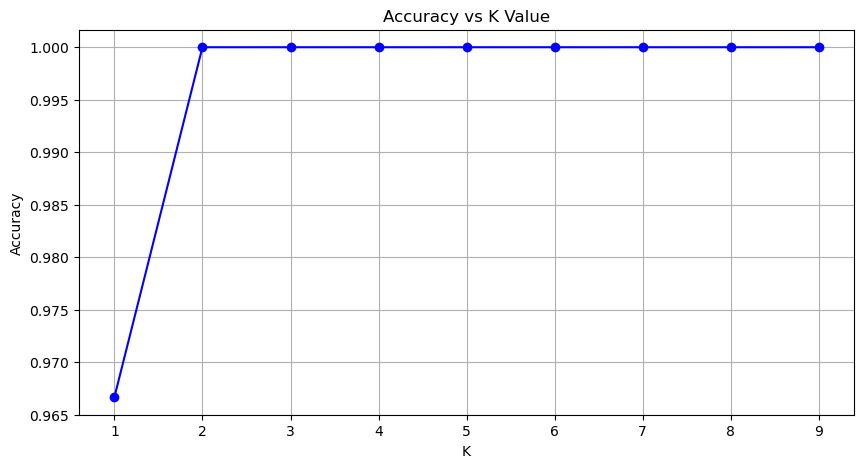

In [6]:
# Try different values of K and track accuracy
k_values = range(1, 10)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

# Plotting accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Accuracy for k=3: 1.0


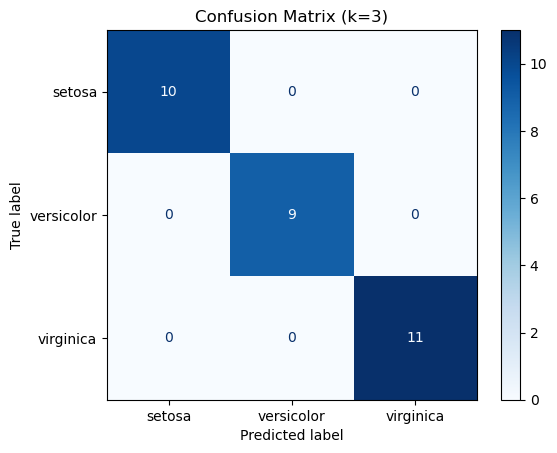

In [7]:
# Print accuracy
print("Accuracy for k=3:", accuracy_score(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (k=3)")
plt.show()


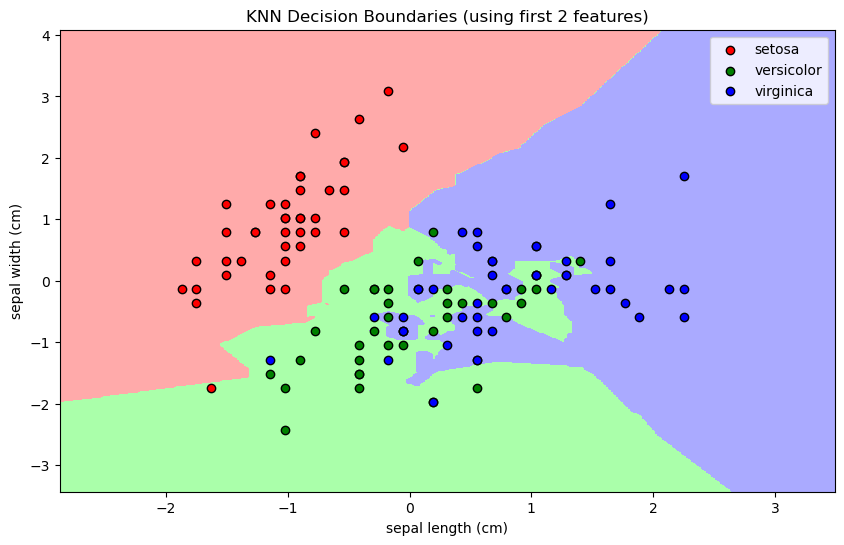

In [8]:
# Use only first two features for visualization
X_vis = X_scaled[:, :2]

# Split again for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Train with K=3
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
for i, color in zip(range(3), cmap_bold):
    idx = np.where(y_train_vis == i)
    plt.scatter(X_train_vis[idx, 0], X_train_vis[idx, 1], c=color, label=iris.target_names[i], edgecolor='black')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("KNN Decision Boundaries (using first 2 features)")
plt.legend()
plt.show()
